In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import pandas_profiling
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_color_codes('dark')

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
df = train_df.copy()

### Head

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### From the above we can clearly see that Loan_Id feature will not help us in anyway futher. So will drop this feature.

In [6]:
df = df.drop('Loan_ID', axis=1)

In [7]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# report = df.profile_report()
# report.to_file('report.html')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#### There are 5 features of number datatype and 7 features of string|object datatype
#### Also, there are missing values present in the dataset.
#### there is 44% of 0 present in Coapplicant feature

### Five Number Summary

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### ApplicantIncome, CoapplicantIncome and LoanAmount features are right skewed and Loan Amount Term and Credit History are left skewed, Hence the dataset is skewed dataset.
#### Outliers is present in ApplicantIncome, CoapplicantIncome, LoanAmount features.

## EDA

### Checking for missing values

In [11]:
def remove_missing_values(df):
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            print("Removing missing values from feature -> {}".format(i))
            if df[i].dtype == 'object':
                df[i].fillna(value = df[i].mode()[0], inplace=True)
            else:
                df[i].fillna(value = df[i].median(), inplace=True)

In [12]:
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    remove_missing_values(df)
else:
    print('There is no missing values present in the dataset')

Removing missing values from feature -> Gender
Removing missing values from feature -> Married
Removing missing values from feature -> Dependents
Removing missing values from feature -> Self_Employed
Removing missing values from feature -> LoanAmount
Removing missing values from feature -> Loan_Amount_Term
Removing missing values from feature -> Credit_History


### Checking for duplicate values

In [13]:
def remove_duplicate_values(df):
    for i in df.columns:
        if df[i].duplicated().sum() > 0:
            print("Removing duplicated values from feature -> {}".format(i))
            df[i].drop_duplicates()

In [14]:
duplicate_values = df.duplicated().sum()
if duplicate_values > 0:
    remove_duplicate_values(df)
else:
    print('There is no duplicate values present in the dataset')

There is no duplicate values present in the dataset


### Shape of dataset

In [15]:
df.shape

(614, 12)

### Checking percentage of 0 in dataset.

In [16]:
count = 0
for i in df.columns:
    if df[i].dtype != 'object':
        for j in df[i]:
            if j == 0.0:
                count += 1
            zero_percent = round((count / len(df)), 2)*100
        count = 0
        print("{} features has {}% zeroes".format(i, zero_percent)) if zero_percent != 0.0 else print('')


CoapplicantIncome features has 44.0% zeroes


Credit_History features has 14.000000000000002% zeroes


#### Therefore, CoapplicantIncome has 44% zeroes of dataset which state that Coapplicant has income 0 they can either house wifes, student or unemployed.
#### Credit_history has 14% zeroes of dataset which tell us that the applicant never took any loan and it is for the first time he/shie is taking loan.

### Univariate analysis

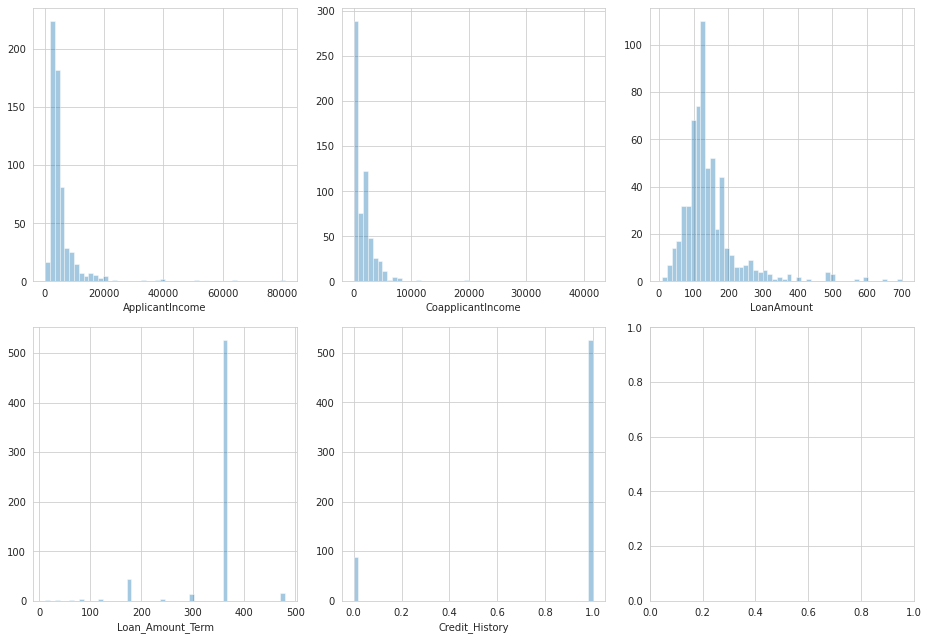

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(13,9));
row = col = 0
for i in df.columns:
    if df[i].dtype != 'object':
        if (row < 2) & (col < 3):
            sns.distplot(df[i], kde=False, bins=50, ax=axes[row][col]);
            col += 1
        else:
            row += 1
            col = 0
            sns.distplot(df[i], kde=False, bins=50, ax=axes[row][col]);
            col += 1
plt.tight_layout()

#### ApplicantIncome, CoapplicantIncome and LoanAmount feature looks normally distributed and right skewed.
#### Outliers is present in ApplicantIncome, LoanAmount and CoapplicantIncome features
#### Credit history feature shows us distribution of two categories that either people have taken loan in the past or not.
#### Loan Amount Term feature has higher magnitude around 370 due to which all other values are affected.

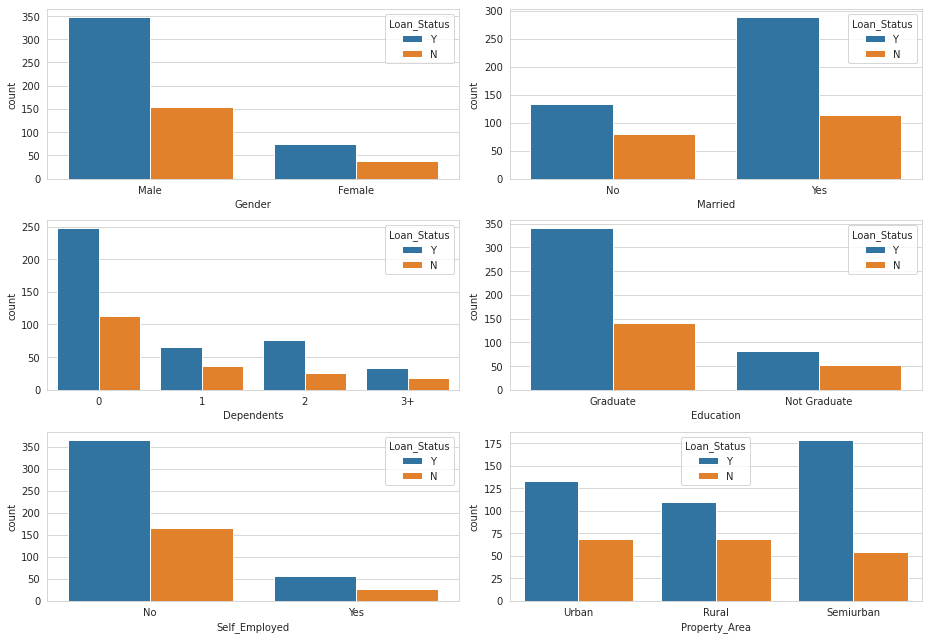

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(13,9));
row = col = 0
for i in df.columns[:-1]:
    if df[i].dtype == 'object':
        if (row < 3) & (col < 2):
            sns.countplot(df[i], hue=df['Loan_Status'], ax=axes[row][col]);
            col += 1
        else:
            row += 1
            col = 0
            sns.countplot(df[i],hue=df['Loan_Status'], ax=axes[row][col]);
            col += 1
plt.tight_layout()

#### Male has high percentage to get the loan whereas female has less percentage.
#### People who are married has high possibilty to get loan status as Y in comparision to unmarried couples.
#### Those who have less dependents are getting yes loan status whereas the high dependents leads in difficulty of getting loan.
#### People who are educated easily getting loan approval.
#### Those who are not self employed that is working in a company getting loan approval easily in comparison to people who are running there business.
#### People with semi urban property area getting easily loan approval.

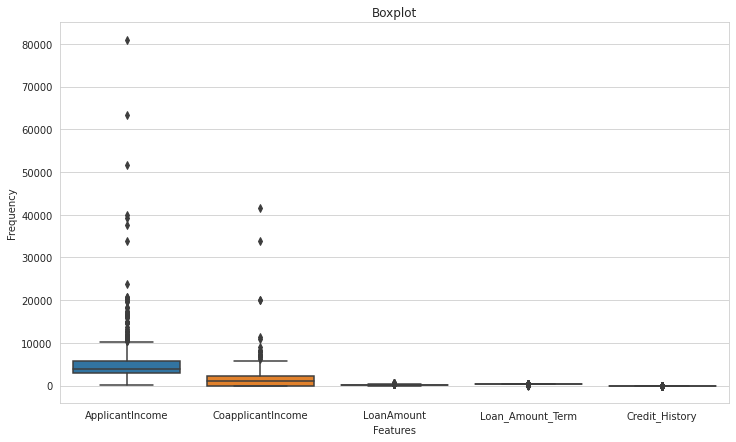

In [19]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df);
plt.title('Boxplot');
plt.xlabel('Features');
plt.ylabel('Frequency');

#### Outliers is present in ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit History features. 
#### Also, we need to scale the data as applicant income feature has high magnitude which is affecting scalling of other features.

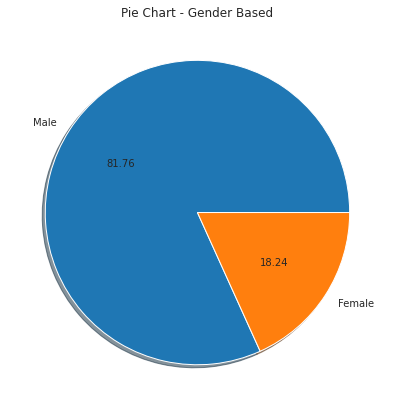

In [20]:
plt.figure(figsize=(12,7));
plt.pie(df['Gender'].value_counts(), labels=['Male', 'Female'], shadow=True, autopct='%0.2f');
plt.title('Pie Chart - Gender Based');

#### Above pie chart shows proportion of Male and Female groups based on the dataset.

### Bivariate Analysis

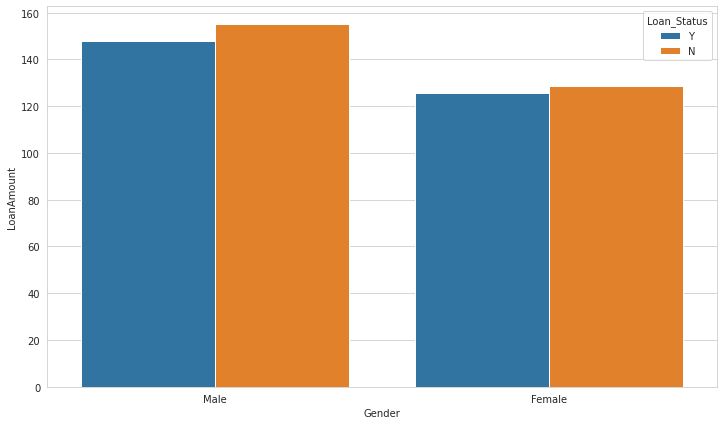

In [21]:
plt.figure(figsize=(12,7));
sns.barplot(x='Gender', y='LoanAmount', data=df, ci=False, hue='Loan_Status');

#### Above bar plot shows that average loan amount in males category is high with respect to females.
#### Both Male and Female have high loan rejected cases that means loan amount increases probability of loan will be cancelled also increases in both categories.

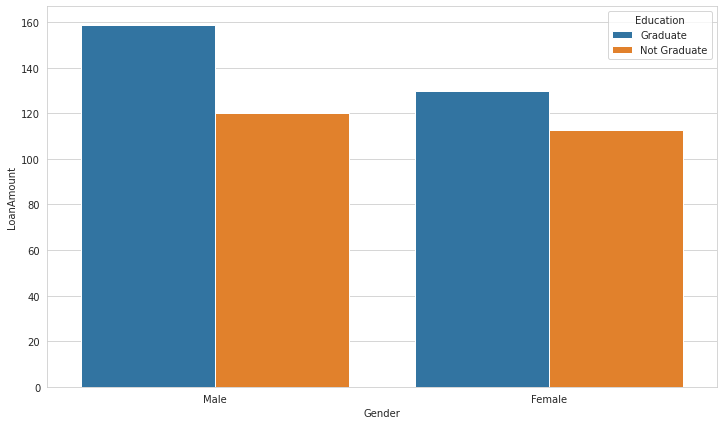

In [22]:
plt.figure(figsize=(12,7));
sns.barplot(x='Gender', y='LoanAmount', data=df, ci=False, hue='Education');

#### Graduated male applied for Loan more than female and have less probability of getting loan amount rejected than females.

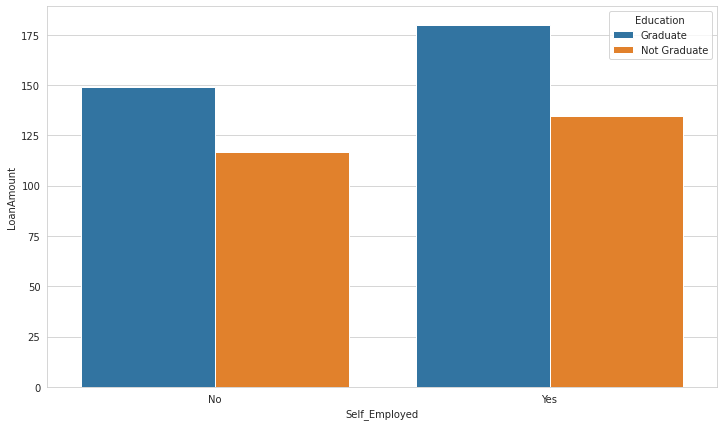

In [23]:
plt.figure(figsize=(12,7));
sns.barplot(x='Self_Employed', y='LoanAmount', data=df, ci=False, hue='Education');

#### Those who are graduated and self employed has high probability of loan approval in comparison to those who were not self employed and educated.

/home/pooja/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/pooja/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/pooja/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


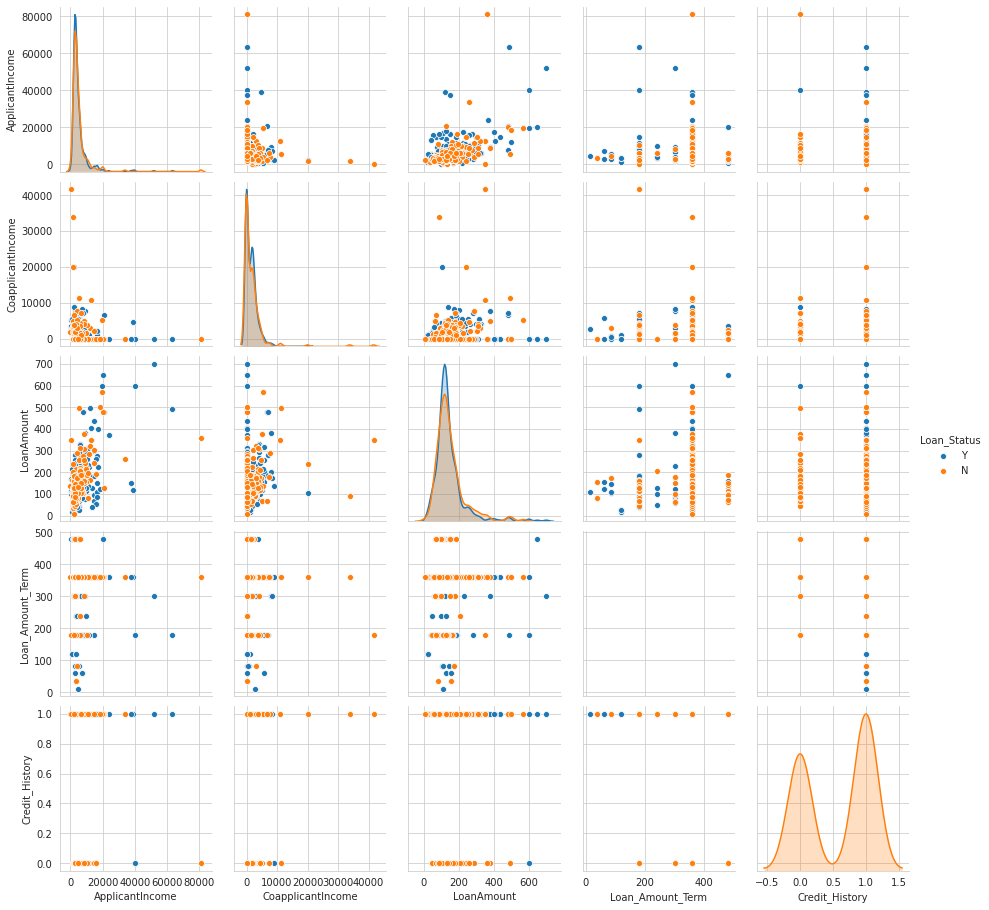

In [24]:
sns.pairplot(data=df, hue='Loan_Status');

#### Above pair plot shows that there is no feature that will have significant impact on loan status.
#### Applicant Income and Loan Amount shows little bit of relation.
#### Credit history density shows bi-modal behavior as there is only two categories 0 and 1 that is why it is showing two peaks.

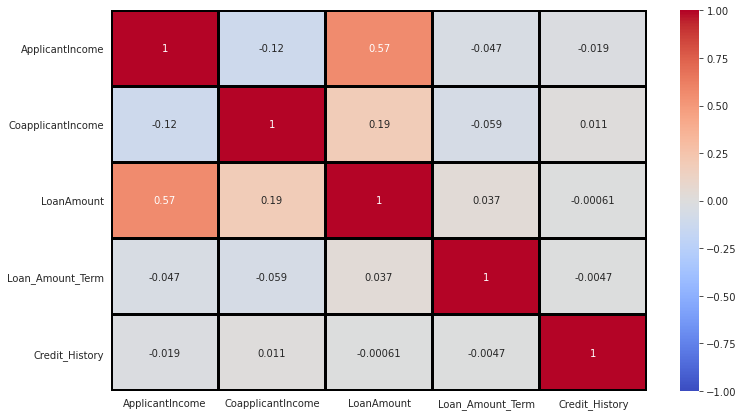

In [25]:
plt.figure(figsize=(12,7));
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', linewidths=2, linecolor='black');

#### Above heat map shows that there is an relationship between loan amount and applicant income otherwise there is no significant relationship between features. 

/home/pooja/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


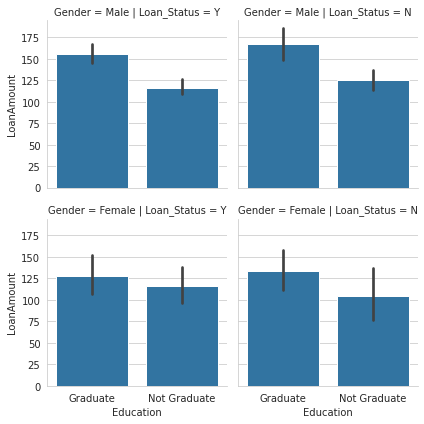

In [26]:
grid = sns.FacetGrid(data=df, row='Gender', col='Loan_Status');
grid.map(sns.barplot, 'Education', 'LoanAmount');

#### Above plot shows that graduated male has high percentage of rejected loan amount than non graduated male as the average loan amount is less.

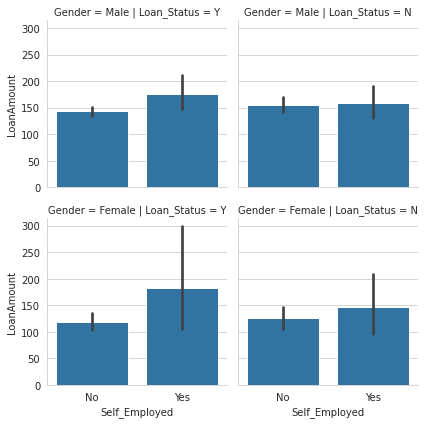

In [27]:
grid = sns.FacetGrid(data=df, row='Gender', col='Loan_Status');
grid.map(sns.barplot, 'Self_Employed', 'LoanAmount');

#### Male and Female who are self employed has high percentage of getting loan approval in comparison to male and female working somewhere else.

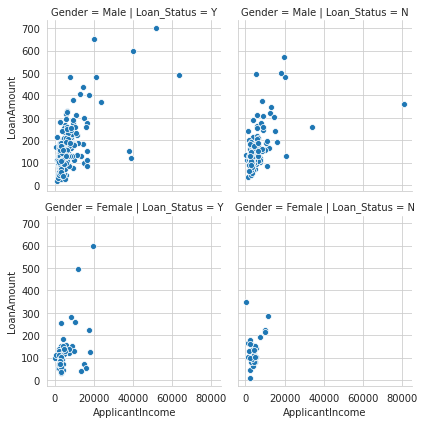

In [28]:
grid = sns.FacetGrid(data=df, row='Gender', col='Loan_Status');
grid.map(sns.scatterplot, 'ApplicantIncome', 'LoanAmount');

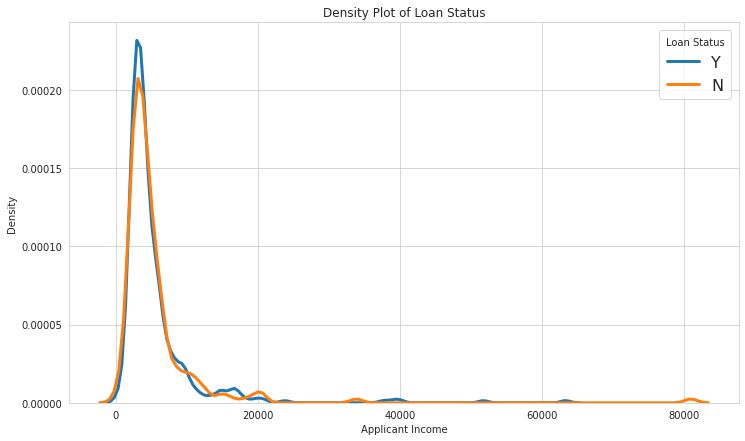

In [29]:
plt.figure(figsize=(12,7));
for i in df['Loan_Status'].unique():
    sub = df[df['Loan_Status'] == i]
    sns.distplot(sub['ApplicantIncome'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i);
plt.legend(prop={'size': 16}, title = 'Loan Status');
plt.title('Density Plot of Loan Status');
plt.xlabel('Applicant Income');
plt.ylabel('Density');

#### Above plot states that applicant with income between range 10000 to 15000 have high chances of getting loan approval.